# A 2D diffusion

Let's simulate a diffusion in 2D,
$$\begin{aligned}
    dX(t) &= dB_1(t) + (- a X(t) - Y(t))dt \\
    dY(t) &= dB_2(t) + (- a Y(t) + X(t))dt
\end{aligned}$$
where $B_1$ and $B_2$ are independent Brownian motions.
This should act like 2d Brownian motion that is attracted to the origin
but in a spiral-ish way.

In [8]:
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt

# First, 2D Brownian Motion

To do this, we'll pick a `dt`,
then use the fact that (in concicse notation):
$$ dB_t \sim N(0, dt) . $$
And, a (standard) 2D Browian motion is just two independent 1D Brownian motions.

In [14]:
dt = 0.001
T = 10
nt = int(T / dt)

B = np.zeros((nt, 2))
for j in range(1, nt):
    B[j, :] = B[j-1, :] + rng.normal(loc=0, scale=np.sqrt(dt), size=2)

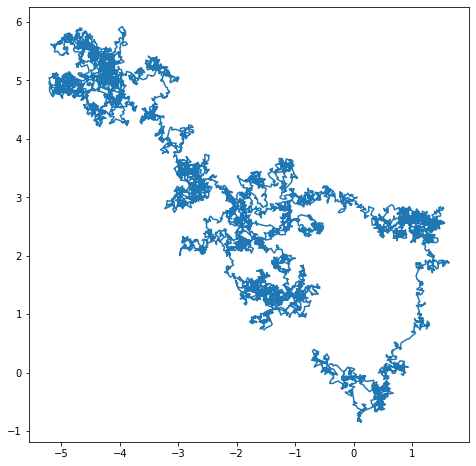

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
ax.plot(B[:,0], B[:,1]);

## Add drift:

Now,
$$\begin{aligned}
    dX(t) &= dB_1(t) + (- a X(t) - Y(t))dt \\
    dY(t) &= dB_2(t) + (- a Y(t) + X(t))dt
\end{aligned}$$

We'll use the *same* Brownian motion as above
to drive this process.
But, first, what is the drift doing here?

In [24]:
a = 1

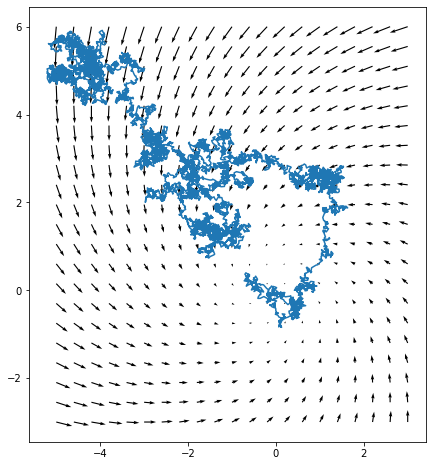

In [29]:
nx = ny = 21
X, Y = np.meshgrid(np.linspace(-5, 3, nx), np.linspace(-3, 6, ny))
U = - a * X - Y
V = - a * Y + X
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
ax.quiver(X, Y, U, V);
ax.plot(B[:,0], B[:,1]);

In [31]:
XY = np.zeros((nt, 2))
for j in range(1, nt):
    dB = B[j, :] - B[j-1, :]
    XY[j, 0] = XY[j-1, 0] + dB[0] + dt * (- a * XY[j-1, 0] - XY[j-1, 1])
    XY[j, 1] = XY[j-1, 1] + dB[1] + dt * (- a * XY[j-1, 1] + XY[j-1, 0])   

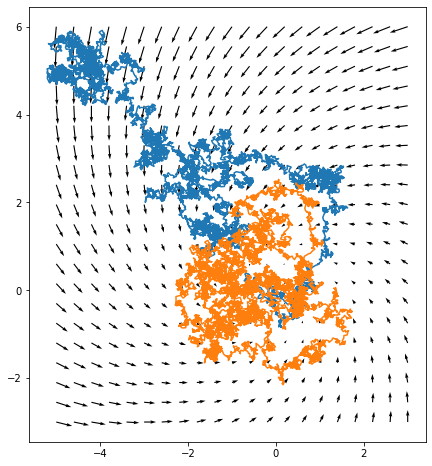

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
ax.quiver(X, Y, U, V);
ax.plot(B[:,0], B[:,1]);
ax.plot(XY[:,0], XY[:,1]);

## Increasing the resolution

Given a Brownian path with resultion `dt`,
can we *refine* it to a higher resolution, while keeping it the same?
In other words, suppose we've sampled
$$
(B_0, B_{dt}, B_{2dt}, \ldots, B_{T - dt}, B_T),
$$
and *given* these values want to get
$$
(B_0, B_{dt/2},  B_{dt}, B_{3dt/2}, B_{2dt}, \ldots, B_{T - dt/2}, B_T).
$$
This is useful because then we can increase the resolution
until it doesn't affect what we're doing.

To do this, we just need to know that given $B_s = a$ and $B_t = b$,
for $s < t$, that
$$
B_{(s+t)/2} \sim \text{Normal}((a+b)/2, (t-s)/4).
$$
(To check that, see [Brownian Bridge](https://en.wikipedia.org/wiki/Brownian_bridge.)
And, the midpoints of a bunch of intervals
are all independent,
given the endpoints,
by independence of increments.

In [56]:
def refine_B(B, dt):
    '''
    Given B simulated with dt,
    return one simulated with dt/2.
    '''
    nt = B.shape[0]
    new_B = np.zeros((2 * nt - 1, B.shape[1]))
    new_B[0, :] = B[0, :]
    k = 1
    for j in range(1, nt):
        a = B[j-1, :]
        b = B[j, :]
        dB = rng.normal(loc=0, scale=np.sqrt(dt/4), size=2)
        new_B[k, :] = (a+b)/2 + dB
        k += 1
        new_B[k, :] = B[j, :]
        k += 1
    return new_B, dt/2

dt = 1
B = np.array([[0, 0], rng.normal(size=2)])


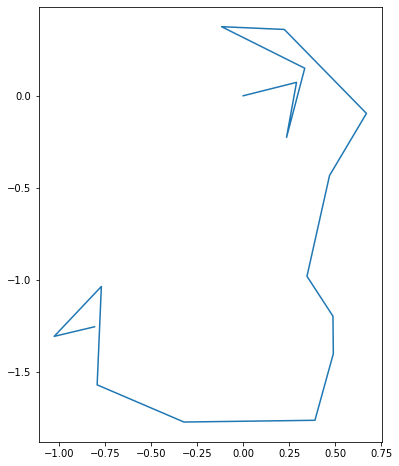

In [57]:
for k in range(4):
    B, dt = refine_B(B, dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
ax.plot(B[:,0], B[:,1]);

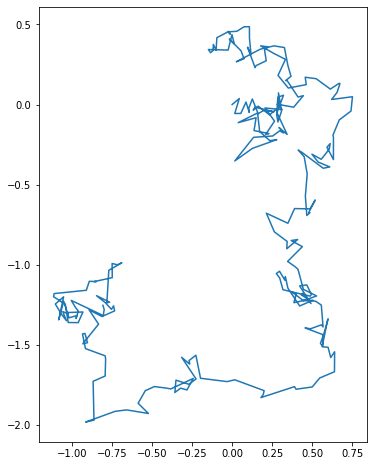

In [58]:
for k in range(4):
    B, dt = refine_B(B, dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
ax.plot(B[:,0], B[:,1]);

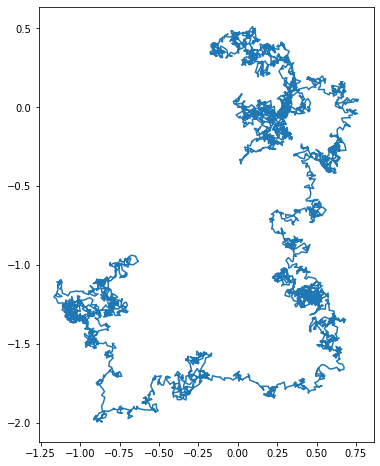

In [59]:
for k in range(4):
    B, dt = refine_B(B, dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
ax.plot(B[:,0], B[:,1]);

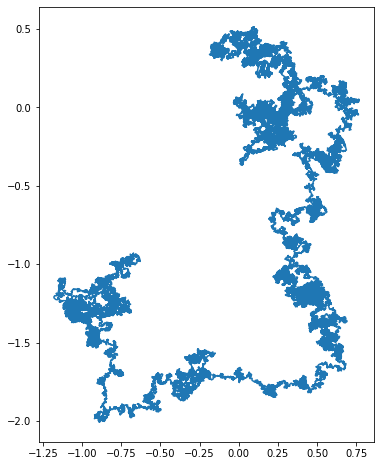

In [60]:
for k in range(4):
    B, dt = refine_B(B, dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)
ax.plot(B[:,0], B[:,1]);